# Исследование  метрик сервиса Яндекс.Афиша

В целях корректировки рекламного бюджета проводится когортный анализ клиентов сервиса, расчет маркетинговых, продуктовых и метрик электронной коммерции в разрезе когорт

Исследование проводится на основании данных Яндекс.Афиши с июня 2017 по конец мая 2018 года (dataset: лог сервера с данными о посещениях сайта Яндекс.Афиши; заказы за этот период; статистика рекламных расходов).

### Оглавление <a name='step_0'></a>
[1. Загрузка и предобработка данных](#step_1)    
    [1.1. Данные о визитах на сайт/сервис](#step_1.1)  
    [1.2. Данные о заказах](#step_1.2)  
    [1.3. Данные о рекламных расходах](#step_1.3)  
[2. Расчет метрик](#step_2)  
    [ 2.1. Продуктовые метрики (на основании данных визитов)](#step_2.1)  
        [2.1.1. DAU, WAU, MAU  и их изменение во времениих](#step_2.1.1)  
            [2.1.1.1. DAU](#step_2.1.1.1)  
            [2.1.1.2. WAU](#step_2.1.1.2)  
            [2.1.1.3. MAU](#step_2.1.1.3)  
            [2.1.1.4. Графики изменение DAU, WAU и  MAU во времени](#step_2.1.1.4)  
        [Выводы  по 2.1.1.](#step_2.1.1v)  
        [2.1.2.  Количество заходов пользователей за день на сайт (среднее и изменение во времени)](#step_2.1.2)  
            [2.1.2.1.  На основании метрики DAU](#step_2.1.2.1)  
            [2.1.2.2.  Анализ на основании MAU](#step_2.1.2.2)  
            [2.1.2.3.  Анализ за весь период](#step_2.1.2.3)  
        [Выводы  по 2.1.2.](#step_2.1.2v)  
        [2.1.3.  Продолжительность сессии пользователей на сайте (ASL и распределение по пользователям)](#step_2.1.3)  
        [Выводы  по 2.1.3.](#step_2.1.3v)  
        [2.1.4.  Рассчет Retention Rate](#step_2.1.4)  
        [Выводы  по 2.1.4.](#step_2.1.4v)  
    [2.2.  Метрики электронной коммерции (на основании данных заказов)](#step_2.2)  
        [2.2.1.  Исследование среднего времени с момента первого посещения сайта до покупки](#step_2.2.1)  
        [Выводы по  2.2.1.](#step_2.2.1v)  
        [2.2.2.  Расчет среднего количества покупок на одного клиента за период](#step_2.2.2)  
        [Выводы по  2.2.2.](#step_2.2.2v)  
        [2.2.3.  Расчет средней выручки с пользователя (изучение динамики метрики во времени)](#step_2.2.3)  
            [2.2.3.1.  Расчет в рамках когорт](#step_2.2.3.1)  
            [2.2.3.2.  Без деления на когорты](#step_2.2.3.2)  
        [Выводы по  2.2.3.](#step_2.2.3v)  
        [2.2.4.  Анализ накопительного LTV по когортам во времени](#step_2.2.4)  
        [Выводы по  2.2.4.](#step_2.2.4v)  
    [2.3.  Маркетинговые метрики](#step_2.3)  
        [2.3.1. Общая сумма расходов на маркетинг,  распределение расходов по источникам,  изменение распределения во времени](#step_2.3.1)  
        [Выводы по  2.3.1.](#step_2.3.1v)  
        [2.3.2.  CAC](#step_2.3.2)  
        [Выводы по  2.3.2.](#step_2.3.2v)  
        [2.3.3.  ROMI по когортам в разрезе источников](#step_2.3.3)  
        [Выводы по  2.3.3.](#step_2.3.3v)  
        [2.3.4. Анализ заказов пользователей в разрезе устройств и платформ](#step_2.3.4)  
[Общие выводы по исследованию](#step_fin)

## 1. Загрузка и предобработка данных<a name='step_1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

In [2]:
df_v = pd.read_csv('visits_log.csv')
df_o = pd.read_csv('orders_log.csv')
df_c = pd.read_csv('costs.csv')

### 1.1. Данные о визитах на сайт/сервис<a name='step_1.1'></a>

In [3]:
df_v.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
# определение уникальных типов устройств
device_list = df_v['Device'].unique().tolist()
device_list

['touch', 'desktop']

In [6]:
# проверка наличия полных дубликатов строк
df_v.duplicated().sum()

0

#### В данных о визитах требуется: 
* замена наименования столбцов (приведение к нижнему регистру и замена пробелов на нижнее подчеркивание);  
* преобразование типа столбцов `End Ts` и `Start Ts` к типу `datetime`.

In [7]:
df_v.columns =[col.lower().replace(' ', '_') for col in df_v.columns.to_list()]
df_v['end_ts'] = pd.to_datetime(df_v['end_ts'])
df_v['start_ts'] = pd.to_datetime(df_v['start_ts'])
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [8]:
# проверка диапазона дат (01.06.2017 - 31.05.2018 гг)
df_v['start_ts'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

### 1.2. Данные о заказах<a name='step_1.2'></a>

In [9]:
df_o.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [11]:
# проверка наличия полных дубликатов строк
df_o.duplicated().sum()

0

#### В данных о заказах требуется: 
* замена наименования столбцов (приведение к нижнему регистру и замена пробелов на нижнее подчеркивание);  
* преобразование типа столбца `Buy Ts` к типу `datetime`.

In [12]:
df_o.columns =[col.lower().replace(' ', '_') for col in df_o.columns.to_list()]
df_o['buy_ts'] = pd.to_datetime(df_o['buy_ts'])
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [13]:
# проверка диапазона дат (01.06.2017 - 31.05.2018 гг)
df_o['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [14]:
# исключение строк с датой больше или равно 2018-06-01 00:00:00
df_o = df_o[df_o['buy_ts'] < '2018-06-01 00:00:00']
df_o['buy_ts'].describe()

count                   50414
unique                  45990
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-05-31 23:56:00
Name: buy_ts, dtype: object

### 1.3. Данные о рекламных расходах<a name='step_1.3'></a>

In [15]:
df_c.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [16]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [17]:
df_c.duplicated().sum()

0

#### В данных о рекламных расходах: 
* преобразование типа столбца `dt` к типу `datetime`.

In [18]:
df_c['dt'] = pd.to_datetime(df_c['dt'])
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [19]:
# проверка диапазона дат (01.06.2017 - 31.05.2018 гг)
df_c['dt'].describe()

count                    2542
unique                    364
top       2017-06-28 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

## 2. Расчет метрик<a name='step_2'></a>

### 2.1. Продуктовые метрики (на основании данных визитов)<a name='step_2.1'></a>

In [20]:
df_v.head(1)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062


In [21]:
# добавление столбцов, соответвующих году, месяцу, недели, дню начала сессии пользователя
df_v['ses_m'] = df_v['start_ts'].dt.strftime('%Y-%m')
df_v['ses_w'] = df_v['start_ts'].dt.strftime('%y%W')
df_v['ses_d'] = df_v['start_ts'].dt.date
df_v['ses_m_dt'] = df_v['start_ts'].astype('datetime64[M]')
df_v.head()

,device,end_ts,source_id,start_ts,uid,ses_m,ses_w,ses_d,ses_m_dt
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12,1751,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02,1808,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07,1726,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05,1820,2018-05-20,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12,1752,2017-12-27,2017-12-01


#### 2.1.1. DAU, WAU, MAU  и их изменение во времении<a name='step_2.1.1'></a>

##### 2.1.1.1. DAU<a name='step_2.1.1.1'></a>

In [22]:
dau_all = df_v.groupby('ses_d').agg({'uid': ['count','nunique']}).reset_index()
dau_touch = df_v[df_v['device'] == 'touch'].groupby('ses_d').agg({'uid': ['count','nunique']}).reset_index()
dau_desktop = df_v[df_v['device'] == 'desktop'].groupby('ses_d').agg({'uid': ['count','nunique']}).reset_index()
dau_all.columns = ['ses_d', 'count_ses','count_un_users']
dau_touch.columns = ['ses_d', 'count_ses','count_un_users']
dau_desktop.columns = ['ses_d', 'count_ses','count_un_users']

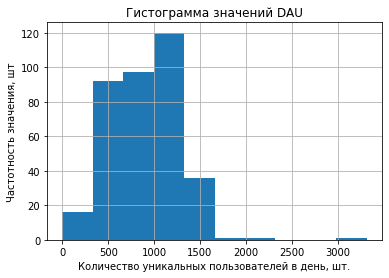

In [23]:
dau_all['count_un_users'].hist()
plt.title('Гистограмма значений DAU')
plt.ylabel('Частотность значения, шт')
plt.xlabel('Количество уникальных пользователей в день, шт.')
plt.show()

In [24]:
dau_all['count_un_users'].describe()

count     364.000000
mean      907.991758
std       370.513838
min         1.000000
25%       594.000000
50%       921.000000
75%      1173.000000
max      3319.000000
Name: count_un_users, dtype: float64

In [25]:
# среднее значение и медиана имеют сопоставимые значения - в качестве "среднего" будем использовать среднее значение
dau_mean = int(round(dau_all['count_un_users'].mean(), 0))
dau_mean

908

##### 2.1.1.2. WAU<a name='step_2.1.1.2'></a>

In [26]:
wau_all = df_v.groupby('ses_w').agg({'uid': 'nunique'}).reset_index()
wau_touch = df_v[df_v['device'] == 'touch'].groupby('ses_w').agg({'uid': 'nunique'}).reset_index()
wau_desktop = df_v[df_v['device'] == 'desktop'].groupby('ses_w').agg({'uid': 'nunique'}).reset_index()
wau_touch.columns = ['ses_w','count_un_users']
wau_all.columns = ['ses_w','count_un_users']
wau_desktop.columns = ['ses_w','count_un_users']

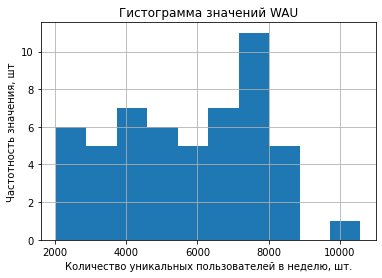

In [27]:
wau_all['count_un_users'].hist()
plt.title('Гистограмма значений WAU')
plt.ylabel('Частотность значения, шт')
plt.xlabel('Количество уникальных пользователей в неделю, шт.')
plt.show()

In [28]:
wau_all['count_un_users'].describe()

count       53.000000
mean      5716.245283
std       2049.898027
min       2021.000000
25%       4128.000000
50%       5740.000000
75%       7401.000000
max      10586.000000
Name: count_un_users, dtype: float64

In [29]:
# среднее значение и медиана имеют сопоставимые значения  - в качестве "среднего" будем использовать среднее значение
wau_mean = int(round(wau_all['count_un_users'].mean(), 0))
wau_mean

5716

##### 2.1.1.3. MAU<a name='step_2.1.1.3'></a>

In [30]:
mau_all = df_v.groupby('ses_m').agg({'uid': ['count','nunique']}).reset_index()
mau_touch = df_v[df_v['device'] == 'touch'].groupby('ses_m').agg({'uid': ['count','nunique']}).reset_index()
mau_desktop = df_v[df_v['device'] == 'desktop'].groupby('ses_m').agg({'uid': ['count','nunique']}).reset_index()
mau_all.columns = ['ses_m', 'count_ses', 'count_un_users']
mau_touch.columns = ['ses_m', 'count_ses', 'count_un_users']
mau_desktop.columns = ['ses_m', 'count_ses', 'count_un_users']

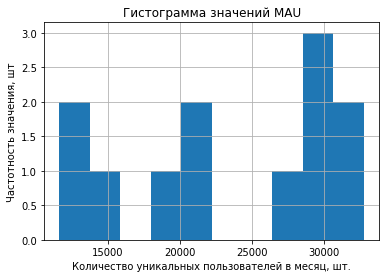

In [31]:
mau_all['count_un_users'].hist()
plt.title('Гистограмма значений MAU')
plt.ylabel('Частотность значения, шт')
plt.xlabel('Количество уникальных пользователей в месяц, шт.')
plt.show()

In [32]:
mau_all['count_un_users'].describe()

count       12.000000
mean     23228.416667
std       7546.380462
min      11631.000000
25%      17777.000000
50%      24240.500000
75%      28984.750000
max      32797.000000
Name: count_un_users, dtype: float64

In [33]:
# среднее значение и медиана имеют сопоставимые значения  - в качестве "среднего" будем использовать среднее значение
mau_mean = int(round(mau_all['count_un_users'].mean(), 0))
mau_mean

23228

##### 2.1.1.4.  Графики изменение DAU, WAU и  MAU во времени <a name='step_2.1.1.4'></a>

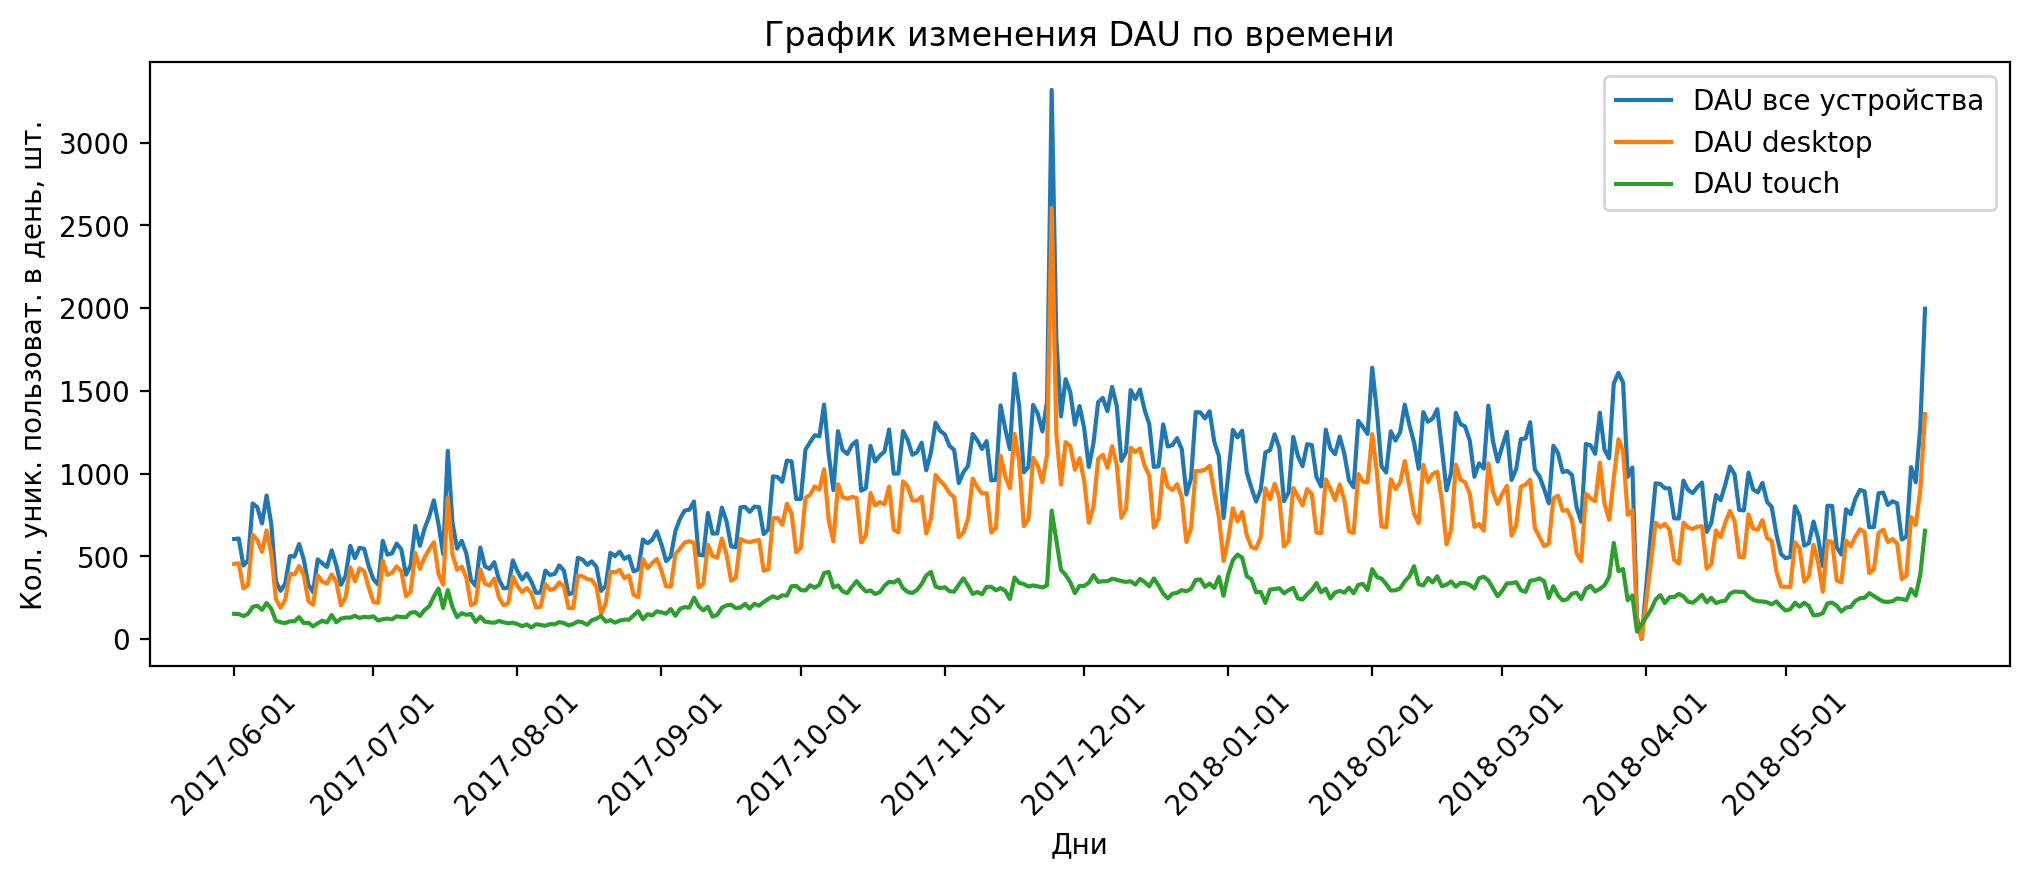

In [34]:
plt.figure(figsize=(12,4), dpi=200)
sns.lineplot(x='ses_d', y='count_un_users', data=dau_all, label='DAU все устройства')
sns.lineplot(x='ses_d', y='count_un_users', data=dau_desktop, label='DAU desktop')
sns.lineplot(x='ses_d', y='count_un_users', data=dau_touch, label='DAU touch')
plt.title('График изменения DAU по времени')
plt.xlabel('Дни')
plt.ylabel('Кол. уник. пользоват. в день, шт.')
plt.xticks(ticks=mau_all['ses_m'], rotation=45)
plt.show()

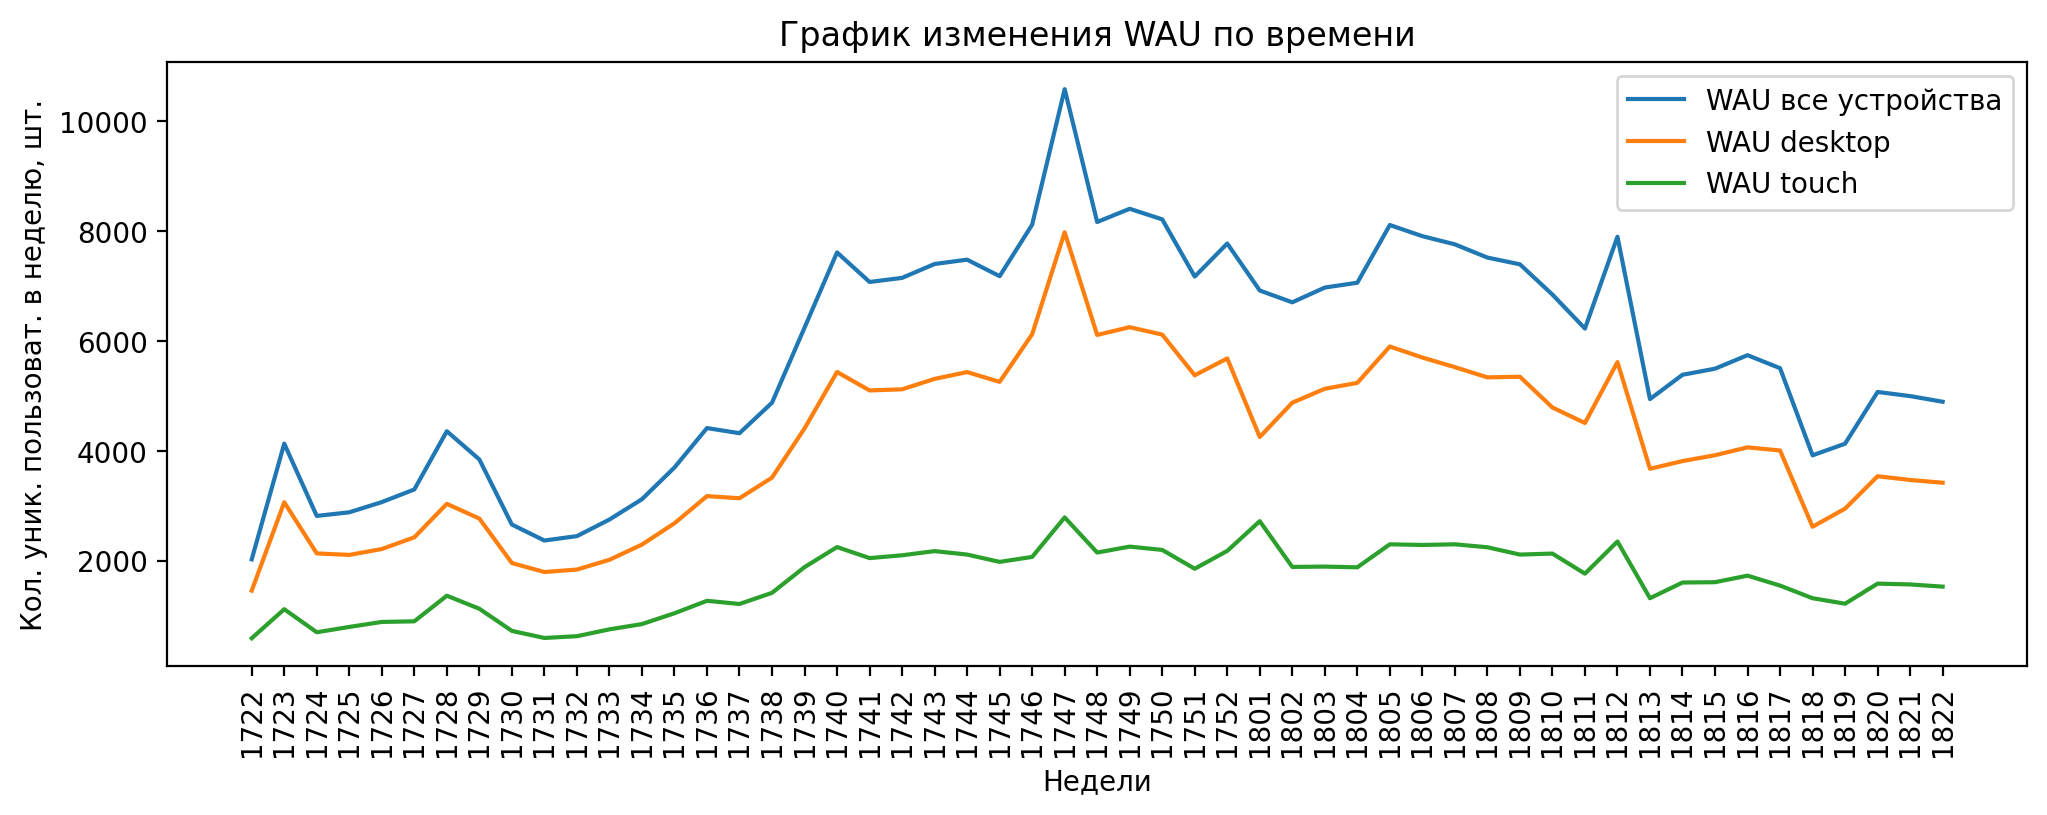

In [35]:
plt.figure(figsize=(12,4), dpi=200)
sns.lineplot(x='ses_w', y='count_un_users', data=wau_all, label='WAU все устройства')
sns.lineplot(x='ses_w', y='count_un_users', data=wau_desktop, label='WAU desktop')
sns.lineplot(x='ses_w', y='count_un_users', data=wau_touch, label='WAU touch')
plt.title('График изменения WAU по времени')
plt.xlabel('Недели')
plt.ylabel('Кол. уник. пользоват. в неделю, шт.')
plt.xticks( rotation=90)
plt.show()

In [36]:
device_list

['touch', 'desktop']

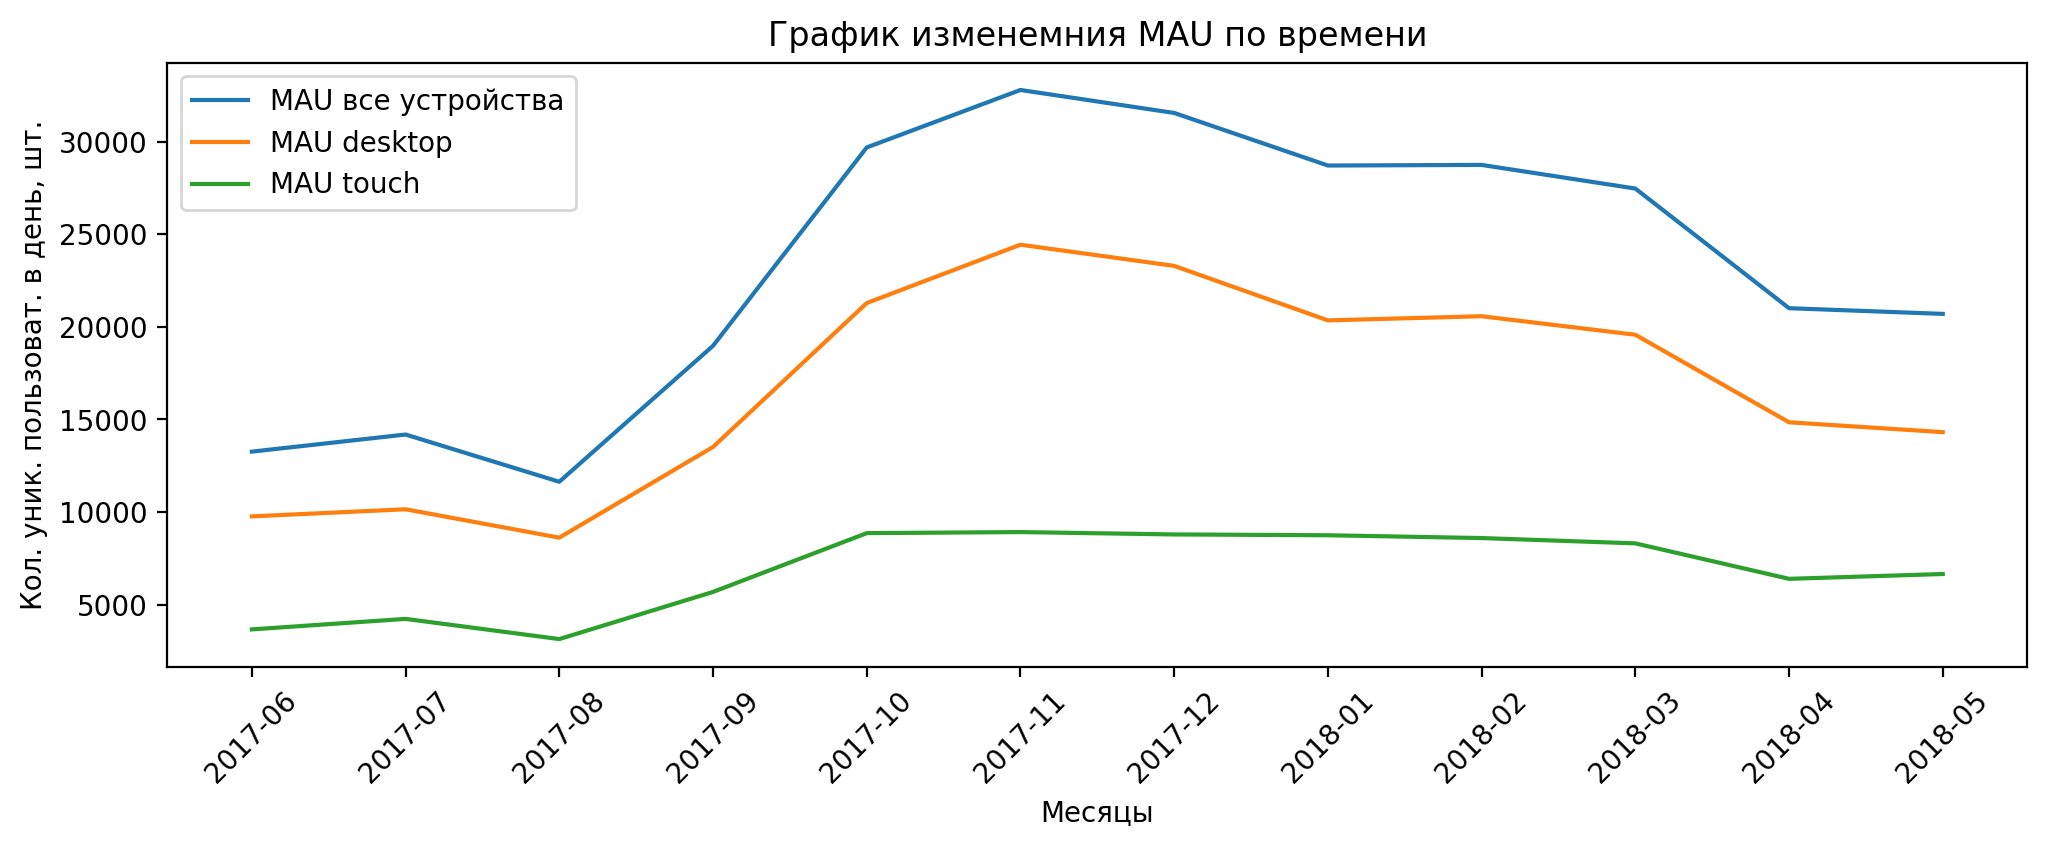

In [37]:
plt.figure(figsize=(12,4), dpi=200)
sns.lineplot(x='ses_m', y='count_un_users', data=mau_all, label='MAU все устройства')
sns.lineplot(x='ses_m', y='count_un_users', data=mau_desktop, label='MAU desktop')
sns.lineplot(x='ses_m', y='count_un_users', data=mau_touch, label='MAU touch')
plt.title('График изменемния MAU по времени')
plt.xlabel('Месяцы')
plt.ylabel('Кол. уник. пользоват. в день, шт.')
plt.xticks(ticks=mau_all['ses_m'], rotation=45)
plt.show()

#### Выводы  по 2.1.1.<a name='step_2.1.1v'></a>
1. Cредние значения метрик по всем платформам за весь период (01.06.2017 - 31.05.2018 гг):  
DAU = 908  
WAU = 5_716  
MAU = 23_228   
Средние значения метрик не соответствуют математическому произведению одних из метрик на соответсвующие константы (количество дней в месяце, количество недель в месяце), что ожидаемо и не является аномалией. 

2. График MAU показывает наличие сезонности в использованинии услуги пользователями: летом активность минимальна, с увеличением в осенние месяцы и пиков в ноябре, затем наблюдается снижение активности (однако представлый период данных не позволяет проанализировать сезонность "год к году"). При этом, на платформе touch сезонность в осенне-весенний период отсутствут, по сравнению с сезонностью decktop пользователей.  
3. График WAU отражает общию тенденцию графика MAU, при этом, показывет наличие в рамках одного месяца разнонаправленные движения, направление которых может не соответствовать тренду месячного графика. А для различных платформ наблюдается в реде периодов разнонаправленная тенденция в одни и теже недели.  
4. График DAU свидетельствует о распределении в с двумя пиками в течении недели. т.е. в рамках недели наблюдается некоторая повторяющаяся "сезонность" по дням (для более подробных вывовдом по недельному распределению требуется дополнительное исследование). При делении на платформы распределение с двумя пиками характерно для decktop пользователей, а пользователи touch проказывают другую форму распределения (в большинстве случаем противоположно направленную по сравнению с deckop пользователям), кроме того недельная сезонность для touch пользователей не так выражена.

*Таким образом, наблюдается различия в между платформами пользователей:*
* в первую очередь в количестве
* во вторую очередь в характере изменения показателя во времени.

[Оглавление](#step_0)
## Общие выводы по исследованию <a name='step_fin'></a>

* Исследование показала, что наибольшее количество покупателей приносит desktop платформа, по сравнению с touch платформой. Данное превосходство наблюдается по всех источникам рекламы, при этом на источниках рекламы 9 и 10 в ряде месяцев показатели по количеству покупателей платформ сравниваются.  
* Что касается показателя ROMI в разрезе источников, то за 6 месяцев среднюю окупаемость больше 1.0 достигли источники 1, 2, 5 и 9 (у источника 1 - наилучший показетель 1.77 среди остальных), а  среднюю окупаемость меньше 1.0 за 6 месяцев имеют источники 3, 4 и 10 (у источника 3 наихудший показетель - 0.41). Маркетологам стоит обратить внимание на источник 3, поскольку он съедает большую часть бюджета и не дает возврата инвестиций.
* Маркетиновая метрика ROMI показалa, в разрезе источников рекламы, какие из них окупают вложенные инвестиции , а какие нет. На основании этой метрики необходимо пересмотреть рекламный бюджет с учетом указанных рекомендаций.
* Продуктовые метрики показали, что пользователи заходят на сайт в первый месяц своего обращения, а дальше возвращаемость очень низкая и продажи обеспечиваются за счет новых покупателей.
* Метрики электронной коммерции подтвердили значения продуктовых метрик о том, что пользователи сервиса осуществляют покупку в первый месяц, а дальнейшие покупки очень редки. При этом показатель среднего чека по мере увеличения возраста когорты растет. Т.е. общий объем продаж от старых покупателей очень низок, а средний чек одного покупателя растет (в сервисе остаются только самые "преданные").
* Когортный анализ покупателей показал, что по мере появления новых когорт покупателей их показатели снижаются, т.е. снижается средняя выручка с пользователя в первый месяц и угасание средней выручки с пользователя для новых когорт происходит быстрее. В связи с этим,  наиболее перспективными для компании являются старые когорты клиентов.
* В целом необходим  более глубокий анализ причин очень низкой возвращаемости клиентов, в связи с чем выручка формируется за счет новых покупателей. Таким образом,  в компании не наблюдается эффекта коммулятивного роста клиенской базы активных(покупающих) клиентов.